# Day 5 Basic Time Series Analysis

In [1]:
using PyPlot
using Statistics
using Distributions
using Random
Random.seed!(1234);

5.1 Curve-fitting     
5.2 Stochastic time-series models    
5.3 Summary and additional questions    

## 5.0 Recap of Last Week

**Frequentist** approach  
* Consider all possible results of an experiment  
* Ask how likely a result as extreme as that seen was  
* P-values, significance and confidence intervals 
* Probability of data given hypothesis  


**Bayesian** approach
* Update prior views using data  
* Resulting posterior can be used as future prior  
* Direct evaluation of probability of hypothesis given data  
* Credible intervals etc more naturally defined.  

## 5.1 Curve-Fitting 

5.1.1 Preprocessing data     
5.1.2 Linear regression    
5.1.3 Polynomial regression     

### 5.1.1 Preprocessing Data

* Identify any "bad" entries in the data: ```NaN``` or similar


* Cut-out or replace with principled replacement  
for example: mean of neighbouring points, linear extrapolation, etc


* Plot out the data and take a good look  
do this before applying any statistical tests


* Smooth data and remove outliers if necessary   

### 5.1.1 Preprocessing: Smoothing


* Many different approaches to smoothing a data set $x_k$


* Boxcar smoothing $x'_k=\frac{1}{2n+1}\sum_{j=-n}^{n}x_{k+j}$


* Weighted smoothing $x'_k=\sum_{j=-n}^{n}w_jx_{k+j}$ where $\sum w_j=1$.


* Iterative $x'_k=x_k(1-2\alpha)+\alpha(x_{k-1}+x_{k+1})$ where $\alpha$ is small.  
Repeat many times as required: effectively diffusive smoothing.


* Remove smoothed data from original data to get at high-frequency components.

### 5.1.2 Linear Regression

* Consider first trivial case of fitting a straight line.


* Imagine $N$ data points data $\{t_n \}$ and $\{x_n \}$


* Want to find the best fit $f_n=\kappa_1t_n+\kappa_0$ in the least-squares sense.


* Define an error function $E=\frac{1}{2N}\sum_{n=1}^N(f_n-x_n)^2$


* **<font color='red'>Question:</font>** What $\kappa_0$ and $\kappa_1$ minimise $E$?


* **HINT** Introduce quantities like $\langle xt \rangle=\frac{1}{N}\sum_{n=1}^Nx_nt_n$ etc

* Error function is $E=\frac{1}{2N}\sum_{n=1}^N(f_n-x_n)^2$


* Fit function is $~f_n=\kappa_1t_n+\kappa_0$   


* **<font color='green'>Answer:</font>** Minimise $E$ to find $\kappa_0$ and $\kappa_1$.


* Minimise $\frac{\partial E}{\partial \kappa_i}=0$ implies $0=\frac{1}{N}\sum_{n=1}^N(f_n-x_n)\frac{\partial f_n}{\partial \kappa_i}$


* Yielding two equations 

$\hspace{0.8cm}\begin{eqnarray}
\kappa_0+\kappa_1\langle  t \rangle&=&\langle x \rangle \\
\kappa_0\langle t \rangle+\kappa_1\langle t^2 \rangle&=&\langle xt \rangle
\end{eqnarray}$


* Straightforward to invert this to give...


$\hspace{0.8cm}\kappa_0=\frac{\langle t^2 \rangle\langle x \rangle-\langle xt \rangle \langle t\rangle}{\langle t^2 \rangle-\langle t \rangle ^2}~$ and $~\kappa_1=\frac{\langle xt \rangle-\langle x \rangle \langle t\rangle}{\langle t^2 \rangle-\langle t \rangle ^2}$


* **Note:** gradient and correlation-coefficient relation $\kappa_1\sigma_t=\varrho\sigma_x$

### 5.1.3 Polynomial Regression$\newcommand{\Ex}[1]{\langle #1 \rangle}$

* Straightforward to generalise to an $M$th order polynomial.


* Now $f_n=\sum_{m=0}^M\kappa_mt^m_n$ with error still $E=\frac{1}{2N}\sum_{n=1}^N(f_n-x_n)^2$.  


* Minimising $E$ with respect to $\kappa_{m'}$ gives  

$\hspace{0.8cm} \kappa_0\langle t^{m'}\rangle + \kappa_1\langle t^{m'+1}\rangle+\cdots+\kappa_M\langle t^{m'+M}\rangle=\langle xt^{m'} \rangle$

* **<font color='red'>Question:</font>** Confirm this!  



* There are $(M+1)$ of these equalities, so that

$
\hspace{0.8cm}\left( 
\begin{matrix}
  1        & \Ex{t}      & \Ex{t^2} & \cdots & \Ex{t^M}\\
  \Ex{t}   & \Ex{t^2}    & \cdots   &        & \Ex{t^{M+1}}  \\
  \Ex{t^2} & \cdots      &          &        & \Ex{t^{M+2}} \\
  \vdots    &             &          &        & \vdots\\
 \Ex{t^M}  & \Ex{t^{M+1}}& \Ex{t^{M+2}}         &   \cdots     &\Ex{t^{2M}} 
 \end{matrix}\right) 
 \left(
\begin{matrix}
 \kappa_0\\ 
 \kappa_1\\
  \kappa_2\\
  \vdots \\
 \kappa_M\\
\end{matrix}
\right)=\left(
\begin{matrix}
 \Ex{x}\\ 
 \Ex{xt}\\
  \Ex{xt^2}\\
  \vdots \\
 \Ex{xt^M}\\
\end{matrix}
\right)$


* Which can be solved numerically by multiplying by the inverse matrix.

### 5.1.3 <font color='red'>Question:</font> Code a Polynomial Fit

Write functions that accept $N$ data pairs $(t_n,x_n)$ and return:  
* The $(M+1)$ polynomial fit parameters $\{\kappa_m\}$ for an $M$th-order polynomial.  
* The error of the fit.  
* The best fit line.


Then...


* Generate a first set of training data: 10 points from a cubic polynomial with zero-mean independent gaussian noise added to each point.  

* Generate a seond set of test data: 10 points from the same cubic polynomial with different zero-mean independent gaussian noise added to each point.  

* Find least-squared fits of the training data to polynomials of orders $M=1,~\cdots,8$ and plot the error as a function of polynomial order.  

* Using the fit parameters generated from the training data, find the error for the test data and plot as a function of polynomial order for the test set on the same graph and compare.  

### 5.1.3 <font color='green'>Answer:</font> Code a Polynomial Fit

#### 5.1.3.1 My Code

Actually, we can reformulate the model into 

$$
X = \begin{bmatrix}
1 & t_1 & t_1^2 & \cdots & t_1^M \\
1 & t_2 & t_2^2 & \cdots & t_2^M \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & t_n & t_n^2 & \cdots & t_n^M \\
\end{bmatrix}_{n \times (M+1)}
\quad 
\beta = \begin{bmatrix}
\kappa_0 \\
\kappa_1 \\
\vdots \\
\kappa_M
\end{bmatrix}_{(M+1) \times 1}
\quad
\text{and}
\quad 
Y = \begin{bmatrix}
x_1 \\
x_2 \\
\vdots \\
x_n
\end{bmatrix}_{n \times 1}.
$$

And we want to minimize

$$
(Y - X \beta)^T(Y - X\beta),
$$

with respect to $\beta$.

Since

$$
(Y - X\beta)^T(Y-X\beta) = Y^TY - 2 \beta^T X^T y + \beta^T X^T X \beta,
$$

we have 

$$
\frac{\partial}{\partial \beta} (Y - X\beta)^T(Y-X\beta) = -2 X^T Y + 2 X^TX\beta.
$$

Let $\frac{\partial}{\partial \beta} (Y - X\beta)^T(Y-X\beta) = 0$ and we have 

$$\hat{\beta} = (X^TX)^{-1}X^T Y.$$

In [2]:
function linear_regression(X, Y)
    return (transpose(X) * X) \ transpose(X) * Y
end

linear_regression (generic function with 1 method)

In [3]:
function mean_square_error(X, Y, β)
    return mean((Y-X*β).^2)
end

mean_square_error (generic function with 1 method)

In [4]:
function generate_X(samples, M)
    n = length(samples)
    col = reshape(samples, (n, 1))
    X = ones(n, 1)
    for k in 1:M
        X = hcat(X, col.^k)
    end
    return X
end

generate_X (generic function with 1 method)

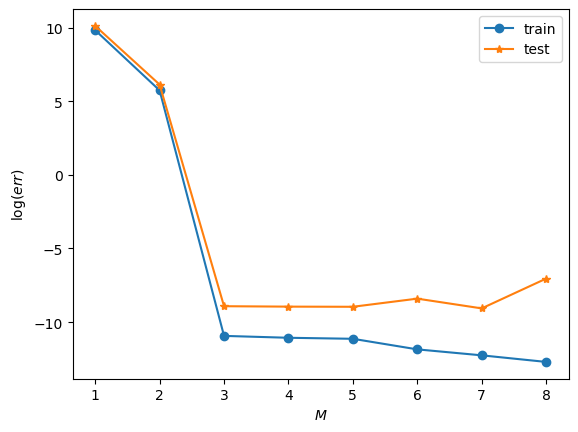

PyObject <matplotlib.legend.Legend object at 0x00000000476886A0>

In [12]:
# n = 10
samples_train = 1:10
samples_test = 1.5:10.5
noise_train = 0.01 * randn(10)
noise_test = 0.01 * randn(10)

#suppose y = x^3 + 2x^2 + 3x + 4 + eps, so M = 3

Y_train = samples_train.^3 + 2*samples_train.^2 + 3*samples_train .+ 4 + noise_train
Y_train = reshape(Y_train, (length(Y_train),1))
Y_test = samples_test.^3 + 2*samples_test.^2 + 3*samples_test .+ 4 + noise_test
Y_test = reshape(Y_test, (length(Y_test),1))

err_train = zeros(8)
err_test = zeros(8)
for M in 1:8
    X_train = generate_X(samples_train, M)
    X_test = generate_X(samples_test, M)
    
    beta = linear_regression(X_train, Y_train)
    err_train[M] = mean_square_error(X_train, Y_train, beta)
    err_test[M] = mean_square_error(X_test, Y_test, beta)
end


plt.plot(1:8, log.(err_train), "o-", label="train")
plt.plot(1:8, log.(err_test), "*-", label="test")
plt.xlabel(L"$M$")
plt.ylabel(L"$\log(err)$")
plt.legend()

#### 5.1.3.2 Magus' Code

In [6]:
# Calculates the mean error using the data x and fit f
function MyError(x,f)
    N=length(x)
    E=(0.5/N)*sum( (x.-f).^2)
    return E
end

MyError (generic function with 1 method)

In [7]:
# Returns a polynomial using the coefficient vector K
function MyPolynomial(t,K)
   
    M=length(K)-1
    N=length(t)
    f=zeros(N)
    for k=0:M
       f=f .+(t.^k)*K[k+1] 
    end
    return(f)

end

MyPolynomial (generic function with 1 method)

In [8]:
# Fits the polynomial constants. 
# Inputs: t and x (the data) M is the polynomial order
function MyPolyFit(t,x,M)
    
    A=zeros(M+1,M+1)
    B=zeros(M+1)
    
    for i=0:M
        B[i+1]=mean(x.*t.^i)
        for j=0:M
            A[i+1,j+1]=mean(t.^(i+j))
        end
    end
    K=inv(A)*B
    
    f=MyPolynomial(t,K)
    E=MyError(x,f)
    
    return K,E
end

MyPolyFit (generic function with 1 method)

In [9]:
# create the function for fitting. Use a cubic
MyFunction(t)=(t .-0).*(t .-0.5).*(t .-0.8)

# Two noisy sample
N=10
t=collect(range(0,stop=1,length=N))
x=MyFunction.(t) .+ 0.01*randn(N); # training
y=MyFunction.(t) .+ 0.01*randn(N); # test

# highly sampled version
tt=collect(0:0.01:1)
xx=MyFunction(tt);
nxx=length(xx);

In [10]:
# do fits from order 1 to Mmax
Mmax=8
Kx=zeros(Mmax,Mmax+1) # matrix for the fit parameters for each polynomial order
Ex=zeros(Mmax) # errors for the training
Ey=zeros(Mmax) # errors for the test set 
fx=zeros(Mmax,N) # fitted data for the training
ffx=zeros(Mmax,nxx)
for M=1:Mmax
    Kx[M,1:M+1],Ex[M]=MyPolyFit(t,x,M);
    fx[M,:]=MyPolynomial(t,Kx[M,1:M+1])
    ffx[M,:]=MyPolynomial(tt,Kx[M,1:M+1])
    Ey[M]=MyError(y,fx[M,:])
end
M=collect(1:Mmax);

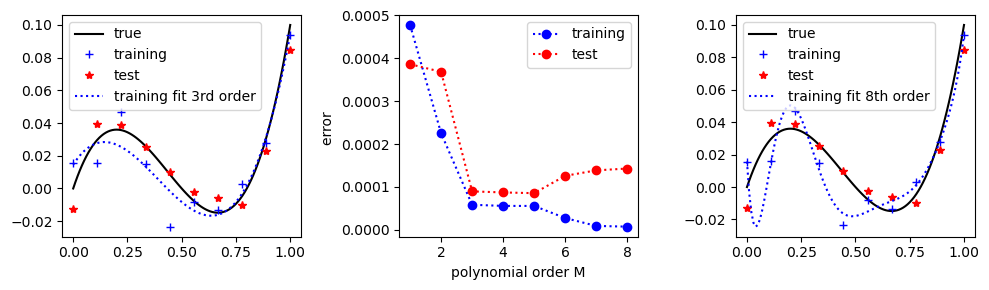

In [11]:
figure(figsize=(10,3))

subplot(131)
plot(tt,xx,"k-",label="true")
plot(t,x,"+b",label="training")
plot(t,y,"*r",label="test") 
plot(tt,ffx[3,:],"b:",label="training fit 3rd order")
legend()

subplot(132)
plot(M,Ex,"bo:",label="training")
plot(M,Ey,"ro:",label="test")
xlabel("polynomial order M")
ylabel("error "); legend()

subplot(133)
plot(tt,xx,"k-",label="true")
plot(t,x,"+b",label="training")
plot(t,y,"*r",label="test")
plot(tt,ffx[8,:],"b:",label="training fit 8th order")
legend()
tight_layout()

## 5.2 Stochastic Time Series Models

5.2.1  Auto-regressive models   
5.2.2  First-order model    
5.2.3  Autocovariance  

### 5.2.1 Auto-Regressive Models$\newcommand{\Ex}[1]{\langle #1 \rangle}$


* Widespread use to model stochastic data  


* Model is discrete, writing current state as function of previous ones  


* An order-p model 
$$X_t=c+\sum_{i=1}^p\phi_iX_{t-i}+\epsilon_t$$
    where $\epsilon_t$ are uncorrelated, normally distributed random numbers with   


$\hspace{0.8cm}$ $\Ex{\epsilon}=0~$ and $~\Ex{\epsilon^2}=\sigma_\epsilon^2$.




* Here we will examine an order-1 model 

$\hspace{0.8cm}$ $X_t=c+\phi X_{t-1}+\epsilon_t$



### 5.2.2 First-Order Auto-Regressive Models  

* First-order model, where we assume $|\phi|<1$ 

$\hspace{0.8cm}$ $X_t=c+\phi X_{t-1}+\epsilon_t~~$ where $~~\Ex{\epsilon}=0~$ and $~\Ex{\epsilon^2}=\sigma_\epsilon^2$.


**<font color='red'>Questions:</font>**


* Suppose $\Ex{X} = \Ex{X_t} = \Ex{X_{t-1}}$, then what is the mean of $\Ex{X}$?

* What is Var$(X)$?

* What is the general solution, if the process has always be ongoing?



**<font color='green'>Answers:</font>**

* For the mean $\Ex{X_t}=c+\phi \Ex{X_{t-1}}$ so   


$\hspace{0.8cm}\Ex{X}=\frac{c}{1-\phi}$    


* Useful to introduce $x_t=X_t-\Ex{X_t}$. Note that  

$\hspace{0.8cm} x_t=\phi x_{t-1}+\epsilon_t$. 

* Var$(X)=\Ex{x_t^2}=\phi^2\Ex{x_{t-1}^2}+\Ex{\epsilon_t^2}$ which gives  

$\hspace{0.8cm}$ Var$(x)=\frac{\sigma_\epsilon^2}{(1-\phi^2)}$


* General solution is 

$\hspace{0.8cm} X_t=\frac{c}{1-\phi}+\sum_{k=0}^\infty\phi^k\epsilon_{t-k}$

### 5.2.3 Autocovariance

* First-order autoregressive model, in steady state.  

$\hspace{0.8cm}$ $X_t=c+\phi X_{t-1}+\epsilon_t~~$ where $~~\Ex{\epsilon}=0~$ and $~\Ex{\epsilon^2}=\sigma_\epsilon^2$.

* Derived mean, variance and general solution

$\hspace{0.8cm}\Ex{X}=\frac{c}{1-\phi}~$, Var$(x)=\frac{\sigma_\epsilon^2}{(1-\phi^2)}~$ and $~X_t=\frac{c}{1-\phi}+\sum_{k=0}^\infty\phi^k\epsilon_{t-k}$


* Examine temporal structure given by autocovariance: 

$\hspace{0.8cm} \Ex{(X_{t+n}-\Ex{X})(X_t-\Ex{X})}=\sum_{j=0}^\infty\sum_{k=0}^\infty\phi^{j+k}\Ex{\epsilon_{t+n-j}\epsilon_{t-k}}$


* **<font color='red'>Question:</font>** Assume $n>0$. What is the autocovariance?

* **<font color='green'>Answer:</font>** 


* $\Ex{\epsilon_{t+n-j}\epsilon_{t-k}}=\sigma_\epsilon^2$ when $j=n+k$, and is zero otherwise.


* Because $n>0$ we have $\Ex{(X_{t+n}-\Ex{X})(X_t-\Ex{X})}=\phi^n\sum_{k=0}^\infty\phi^{2k}\sigma_\epsilon^2$


* So the autocovariance is 


$\hspace{0.8cm} \Ex{(X_{t+n}-\Ex{X})(X_t-\Ex{X})}=\phi^{|n|}\frac{\sigma_\epsilon^2}{(1-\phi^2)}$


* NB: Check the result for $n<0$ yourself.


## 5.3 Summary and Additional Questions

### Day 5 Basic Time-Series Analysis

5.1 Curve-fitting     
5.2 Stochastic time-series models    
5.3 Summary and additional questions 

### Questions

Make sure you have understood and done all the questions in the lectures.

Answers to the questions below are to be emailed in for marking by 12noon Thursday 3rd December 2020.    

**Q5.3.1** Analysis of exo-planet data  
**Q5.3.2** Autocovariance of an autoregressive model  
**Q5.3.3** Distribution of sample means for an autoregressive process  

#### <font color='red'>Q5.3.1</font> Analysis of Exo-Planet Data

* Download the **exoplanet-data.txt** file from the course website.  
* The x-axis is in days, the y-axis is raw light intensity from the star.  
* The dips are caused by a planet passing in front of the star.  
* It can be assumed that this is a single-planet system.


* Some cleaning of the data will be required.


* Part (a) Estimate the orbital period of the planet, with a figure showing method.


* Part (b) Assume the flux from the star is proportional to the area of the disc it presents to the telescope.  
Estimate the ratios of the planetary and solar radii. 
Provide a figure showing method.


* Part (c) Estimate the transit time in days, with a figure showing method.  

**NOTE** There is no need to provide ranges for data.


#### <font color='red'>Q5.3.2</font> Autocovariance of an Autoregressive Model

* Simulate a first order autoregressive model with your parameter choice  
for $c$, $\phi$ and $\sigma_\epsilon$ (but with $|\phi|<1$).


* Run the simulation for $5000$ steps and demonstrate that $\Ex{X}$ and Var$(X)$ are comparable to theory.



* Extract the autocovariance from the data.  
Provide a plot comparing it to the theoretical prediction.


#### <font color='red'>Q5.3.3</font> Distribution of Sample Means for an Autoregressive Process  

*  Simulate a first-order autoregressive process for $100,000$ steps with $c=0$, $\phi=0.9$ and $\sigma_\epsilon=2$.  


*  Calculate the distribution of sample means in two ways. For the first way, take $10,000$ random samples of $10$ adjacent data points. For the second way, take $10,000$ random samples of $10$ data points each picked from any step of your autoregressive process.  


* Plot out the histograms of the sample means for these two cases and examine if they agree with what would be expected from a naive application of the central-limit theorem (you can assume knowledge of the true mean and variance used to generate the autoregressive process). Comment on the differences if any between the two ways of calculating the sample means.  